# Анализ финансовых транзакций и клиентов

## Составление DataFrame

Воспользуемся Pandas: чтобы из clients_data.json и transactions_data.xlsx получить датасеты и работать в последствии именно с ними!

И посмотрим, конечно, что все действительно выгрузилось! (таблички объемные, поэтому ограничим вывод)

In [14]:
import pandas as pd

clients_data = pd.read_json('./data/clients_data.json')
clients_data.head()

,id,age,gender,net_worth
0,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,41.0,Мужчина,2514729.46
1,c940f45c-d29b-439a-8fa3-f75018cef528,28.0,Мужчина,566568.29
2,cfa21d7e-8499-43d0-9dfb-f4a1b94ce44c,55.0,Женщина,1896001.28
3,NaN,38.0,Женщина,4538759.60
4,3f43d7bc-37f0-4535-8391-51702d6ff81e,31.0,Мужчина,4865849.92


In [38]:
transactions_data = pd.read_excel('./data/transactions_data.xlsx')
transactions_data.head()

,transaction_id,client_id,transaction_date,service,amount,payment_method,city,consultant
0,ff36597c-df41-44a0-9f46-6aa1fe615270,1ec5ab91-fdd0-4925-a221-f0c4e04fe0e7,2025-01-04 00:02:20,Структурирование капитала,55838.059789,Банковский перевод,North Patrickport,Cheryl Waller
1,0d5263ec-413d-44d9-a9d3-a996e3a56b05,c940f45c-d29b-439a-8fa3-f75018cef528,2025-03-10 17:16:50,Структурирование капитала,37514.809209,Неизвестно,New Zacharyport,Frank Pollard
2,5e9a8978-df1c-483f-a53b-16149c93f11e,cfa21d7e-8499-43d0-9dfb-f4a1b94ce44c,2025-02-13 19:43:49,Структурирование капитала,21022.146872,Неизвестно,Port Michellemouth,Alexandra Meyer
3,524031ea-56e2-410a-aee2-e8fc6ae3fbc5,NaN,2025-03-02 03:14:10,Финансовое планирование,2313.980219,Неизвестно,Erichaven,Patricia Haas
4,421aaf04-c97d-42ac-b35f-09a56bbaf910,3f43d7bc-37f0-4535-8391-51702d6ff81e,2025-03-18 21:00:36,Структурирование капитала,5636.586955,Неизвестно,Bondstad,Melissa Pena
...,...,...,...,...,...,...,...,...
9995,8c90fcca-6a86-4126-a645-62f0f00e09ff,b79d6e9f-75f6-4af9-8fdf-b42aac298a84,2025-01-14 05:07:17,Налоговое планирование,117114.096418,Неизвестно,South Thomas,John Wolfe
9996,2234c632-4ee9-4564-8640-dd6b76838487,d2a4a79b-26ba-41c9-b720-1362b9f464f0,INVALID_DATE,Финансовое планирование,19895.571828,Кредитная карта,Davidsonborough,Ronald Shepherd
9997,03532e95-60c2-45ff-a731-3651d596989d,5e1d67fb-26ea-48cc-9e2d-e2edbda404d0,2025-02-09 17:33:42,Неизвестная услуга,79279.034410,Банковский перевод,Lake Arielmouth,Mary Howard
9998,f5df7e5e-5e5e-4492-afc7-98040ff89dde,77ea6e72-df3c-47d4-a043-f990cc05a6f4,2025-01-21 03:54:39,Инвестиционное консультирование,26365.015457,Криптовалюта,Tonystad,David Palmer


## Проверка данных у клиентов

In [16]:
clients_data.info()

print("\n Дубликатов строк: ", clients_data.duplicated().sum())
print("\n Дубликатов id: ", clients_data['id'].duplicated().sum())

print("\n Минимальный возраст: ", clients_data['age'].min())
print("\n Максимальный возраст: ", clients_data['age'].max())
print("\n Минимальная стоимость активов клиента: ", clients_data['net_worth'].min())

print("\n Смотрим, где есть NaN!")
print(clients_data.isnull().sum())

<class 'pandas.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9798 non-null   str    
 1   age        8816 non-null   float64
 2   gender     6480 non-null   str    
 3   net_worth  9324 non-null   float64
dtypes: float64(2), str(2)
memory usage: 306.3 KB

 Дубликатов строк:  0

 Дубликатов id:  0

 Минимальный возраст:  20.0

 Максимальный возраст:  60.0

 Минимальная стоимость активов клиента:  10213.97

 Смотрим, где есть NaN!
id              1
age           983
gender       3319
net_worth     475
dtype: int64


## Проверка данных в таблице с транзакциями

In [23]:
transactions_data.info()

print(transactions_data.describe(include='all'))

print("\n Дубликатов строк: ", transactions_data.duplicated().sum())
print("\n Дубликатов id транзакций: ", transactions_data['transaction_id'].duplicated().sum())
print("\n Равно ли количество уникальных транзакций количеству транзакций без NaN: ",
     (transactions_data['transaction_id'].nunique() == transactions_data['transaction_id'].count()))
# nunique() - подсчитает количество уникальных значений, count() подсчитает только количество non-null значений

print("\n Минимальное значение транзакции: ", transactions_data['amount'].min())
print("\n Невалидные даты: ", (transactions_data['transaction_date'] == 'INVALID_DATE').sum())

print("\n Смотрим, где есть NaN!")
print(transactions_data.isnull().sum())

print("\n Какие есть уникальные значения в каждом поле (кроме id клиентов и транзакций)? Цель - найти что-то неизвестное\n")
print("\n Услуги:", transactions_data['service'].unique())
print("\n Способы оплаты:", transactions_data['payment_method'].unique())
print("\n Города:", transactions_data['city'].unique())
print("\n Консультанты:", transactions_data['consultant'].unique())

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    9526 non-null   str    
 1   client_id         9798 non-null   str    
 2   transaction_date  10000 non-null  object 
 3   service           10000 non-null  str    
 4   amount            9540 non-null   float64
 5   payment_method    10000 non-null  str    
 6   city              10000 non-null  str    
 7   consultant        10000 non-null  str    
dtypes: float64(1), object(1), str(6)
memory usage: 625.1+ KB
                              transaction_id  \
count                                   9526   
unique                                  9526   
top     ff36597c-df41-44a0-9f46-6aa1fe615270   
freq                                       1   
mean                                     NaN   
std                                      NaN   
min                                 

In [12]:
duplicated_ids = transactions_data.loc[transactions_data['transaction_id'].duplicated(keep=False), 'transaction_id']
print(duplicated_ids)

11      NaN
51      NaN
177     NaN
205     NaN
295     NaN
       ... 
9917    NaN
9928    NaN
9937    NaN
9950    NaN
9967    NaN
Name: transaction_id, Length: 474, dtype: str


## Какие проблемы в данных?

### Клиенты

- Неуникальных id нет!
- Поле не заполнено: NaN в id, age, gender, net_worth

- Невалидные значения (необнаруженные:)):

    - Невалидный возраст (например, меньше 0 лет), но минимальный возраст 20.0, максимальный - 60.0
    - Отрицательные значения в столбце net_worth, но минимальное значение в этом столбце 10214

Итог:
- необходимо удалить строчки, в которых есть пропущенные данные в полях id, net_worth (хотелось бы не потерять еще одного клиента с неуказанным id, но транзакции привязаны к его id, поэтому придется удалить)
- пол заменим на строку, что гендер не указан
- незаполненный возраст заменим медианным значением (эта информация некритична в контексте будущего анализа, поэтому этой неточностью можно пренебречь, чтобы не потерять эти строки с уникальной информацией)

### Транзакции

- Дубликаты в transaction_id (но это все NaN)

- Поле не заполнено:

    - NaN в transaction_id, client_id, amount

    В других столбцах NaN нет, но:
    - Неизвестная услуга в service
    - Неизвестный способ оплаты в payment_method
    - Неизвестный город в city
    - Неизвестный консультант в consultant

    Будто, это не так страшно, так как можно было бы выделить в отдельную группу, но с учетом того, что в дальнейшем я планирую прогнозировать спрос на определенную услугу (а можно было бы усложнить и посмотреть, какое количество клиентов может быть у определенного консультанта), а также определить топ-5 наиболее популярных услуг по количеству заказов, рассчитать среднюю сумму транзакций по каждому городу, определить услугу с наибольшей выручкой, вычислить процент транзакций по способам оплаты, то такие большие группы с неизвестными данными помешают эффективно оценить, поэтому такие строчки тоже удалим

- Невалидные значения:

    - INVALID_DATE в transaction_date
    - Отрицательных транзакций нет (минимальная 14)


Итог:
- удаляем строки в которых поля содержат либо NaN, либо какие-либо неизвестные данные
- приводим к единому формату даты транзакций
- удаляем строки с незаполненными id транзакции (теоретически, в контексте задания эти id можно заменить на уникальные, но мне кажется такой подход в корне неверным: так мы будем подменять реальные данные, возможно, существует еще одна таблица, которая привязана к этой через id транзакции, а так же причина может быть в том, что, допустим, при сборе информации мы не учитывали статус транзакции (отменена/успешна), тогда мы могли по ошибке считать отмененную транзакцию, тогда у нас нет возможности идентифицировать успешные транзакции)

In [26]:
clients_data = clients_data.dropna(subset=['id', 'net_worth'])

clients_data['age'] = clients_data['age'].fillna(clients_data['age'].median())
clients_data['gender'] = clients_data['gender'].fillna('пол не указан')

print(clients_data.isnull().sum())
print(clients_data.sample(10))

id           0
age          0
gender       0
net_worth    0
dtype: int64
                                        id   age         gender   net_worth
5143  15128c73-ad37-4227-bd0e-9e86f468ccb0  28.0        Мужчина  3954481.89
1790  9912a9c7-feb2-41d1-8065-b0adb3cf6e3a  41.0  пол не указан   412559.54
3789  a2ba198c-ac61-40ee-ab6f-74c1e73e4f24  54.0        Мужчина  1308614.51
9404  f71ff205-56f9-4ece-a12f-d2423cbc8c8c  55.0        Мужчина   159349.55
7463  536392bf-6f6e-4f51-9fac-9fd1c6e886bd  56.0        Женщина  2899547.05
365   308ed314-2c19-4ab4-9463-0c7048296a53  41.0        Женщина  1638211.52
9274  58ebab84-c6e6-4a02-b65d-058bbd97add0  27.0        Женщина  3723020.10
5159  9842ec60-2b6d-4045-80fe-3c8db209cc79  54.0        Женщина  1318524.86
9362  072297ff-e609-4b81-87d3-93735a0aa9a2  43.0  пол не указан  1445595.37
8068  47505f09-3950-4f3b-9fa3-9a541b3ceb18  33.0        Женщина  2193875.08


In [40]:
transactions_data['transaction_date'] = pd.to_datetime(transactions_data['transaction_date'],errors='coerce')
transactions_data = transactions_data.dropna(subset=['transaction_id', 'client_id', 'amount', 'transaction_date'])

unknown = ['Неизвестная услуга', 'Неизвестный город', 'Неизвестный консультант', 'Неизвестно']
transactions_data = transactions_data[~transactions_data['service'].isin(unknown) &
        ~transactions_data['payment_method'].isin(unknown) &
        ~transactions_data['city'].isin(unknown) &
        ~transactions_data['consultant'].isin(unknown)]

print(transactions_data.isnull().sum())
print("\n Услуги:", transactions_data['service'].unique())
print("\n Способы оплаты:", transactions_data['payment_method'].unique())
print("\n Города:", transactions_data['city'].unique())
print("\n Консультанты:", transactions_data['consultant'].unique())
print(transactions_data.sample(10))

transaction_id      0
client_id           0
transaction_date    0
service             0
amount              0
payment_method      0
city                0
consultant          0
dtype: int64

 Услуги: <StringArray>
[      'Структурирование капитала', 'Инвестиционное консультирование',
          'Налоговое планирование',             'Управление активами',
         'Финансовое планирование']
Length: 5, dtype: str

 Способы оплаты: <StringArray>
['Банковский перевод', 'Кредитная карта', 'Криптовалюта', 'Наличные']
Length: 4, dtype: str

 Города: <StringArray>
[ 'North Patrickport',      'West Jaymouth',           'Tonystad',
        'Ronaldville',     'Elizabethmouth',        'Johnsonfort',
      'Matthewsville',  'Lake Sallychester',        'Trevinoberg',
       'South Andrew',         'Davidmouth',   'North Lauriebury',
   'New Dianechester',    'Lake Arielmouth',        'Krystalland',
          'Aprilstad',       'South Thomas',       'Hamiltontown',
          'Erichaven', 'West Meredith

## Анализ данных

1) Определить топ-5 наиболее популярных услуг по количеству заказов

на самом деле нам бы хватило transactions_data['service'].value_counts() тк всего услуг без неизвестной осталось 5, а в качестве дефолта на ascending указывается False)

In [69]:
transactions_data['service'].value_counts(ascending=False).head()

service
Инвестиционное консультирование    1656
Управление активами                1335
Финансовое планирование            1018
Налоговое планирование             1009
Структурирование капитала           997
Name: count, dtype: int64

2. Рассчитать среднюю сумму транзакций по каждому городу

In [88]:
transactions_data.groupby('city')['amount'].mean()

city
Aprilstad             49021.385592
Bondstad              51922.100558
Cruzport              48255.340459
Dannyburgh            49044.252926
Davidmouth            44818.375821
Davidsonborough       50684.103572
East Jamie            43140.616095
East Matthewmouth     49798.047793
East Melissaville     48914.337450
East Rachelmouth      56153.191111
Elizabethmouth        43127.042681
Erichaven             51068.480435
Hamiltontown          50701.479162
Harrisberg            49385.120061
Ibarramouth           46656.635557
Jeanettetown          47260.808562
Johnsonfort           51756.078888
Kaneburgh             53925.482156
Karenville            47881.913477
Krystalland           53761.251621
Lake Arielmouth       50814.911617
Lake Sallychester     45655.040068
Lake Tina             51427.718608
Matthewsville         45936.628812
Mayoberg              51595.262888
Michellehaven         55001.058184
Mirandaside           45321.975404
New Chelseaberg       49486.105249
New Dianecheste

3. Определить услугу с наибольшей выручкой

In [76]:
transactions_data.groupby('service')['amount'].mean().head(1)

service
Инвестиционное консультирование    50610.885714
Name: amount, dtype: float64

4. Вычислить процент транзакций по способам оплаты

In [82]:
proportions = transactions_data['payment_method'].value_counts(normalize=True)
percents = (proportions * 100)
print(percents)

payment_method
Кредитная карта       44.256027
Банковский перевод    38.736492
Наличные              11.088944
Криптовалюта           5.918537
Name: proportion, dtype: float64


5. Рассчитать выручку за последний месяц

Сначала найдем последнюю дату транзакции, затем начало периода - начало месяца, выберем только те строки, которые входят в этот период и рассчитаем среди ниъ выручку для кажлого консультанта

In [87]:
last_date = transactions_data['transaction_date'].max()
print(last_date)
month_start = last_date.replace(day=1, hour=0, minute=0, second=0, microsecond=0)
print(month_start)

last_month_data = transactions_data[transactions_data['transaction_date'] >= month_start]
last_month_data.groupby('consultant')['amount'].sum()

2025-03-20 12:26:18
2025-03-01 00:00:00


consultant
Alexandra Meyer      1.891139e+06
Antonio Benton       1.187926e+06
Catherine Lawson     1.520259e+06
Chad Raymond         1.326609e+06
Cheryl Waller        1.471352e+06
Courtney Callahan    1.122273e+06
Cynthia Coleman      1.785967e+06
David Palmer         1.654516e+06
David Thompson       1.592965e+06
Deborah Stone        1.822828e+06
Dylan Martin         1.260989e+06
Edwin Cantrell       9.481142e+05
Emily Stewart        1.327892e+06
Erik Garcia          1.859032e+06
Ethan Lowe           1.076817e+06
Frank Pollard        1.242861e+06
Gary Stevenson       1.346119e+06
Gregory Williams     1.872713e+06
Harold Gibson        1.091868e+06
Jason Beard          1.175438e+06
Jessica Bates        1.811425e+06
John Wolfe           1.767318e+06
Jordan Phillips      1.108801e+06
Joshua Fuentes       1.614311e+06
Judith Hansen        1.390360e+06
Julie Jones          1.471781e+06
Katherine Smith      1.686777e+06
Kathryn Young        2.010008e+06
Kirsten Martin       1.785741e+06
Lau

## Объединение данных

1. Объединить транзакции с клиентскими данными (по id)
     в методе merge дефолтно тип join - inner
2. Создать новую колонку с уровнями активов
    - Низкий капитал (<100 000)
    - Средний капитал (100 000 - 1 000 000)
    - Высокий капитал (>1 000 000)

    При помощи метода apply определим категорию клиента, прописав простую функцию, которая анализирует net_worth
3. Определить, какие категории клиентов приносят наибольшую выручку

   Мне стало просто интересно сгруппировать по нескольким столбцам и посмотреть, как составляют выручку для каждого консультанта разные группы клиентов

In [103]:
merged = pd.merge(transactions_data, clients_data, left_on='client_id', right_on='id')

def select_category(net_worth):
    if net_worth < 100000:
        return 'Низкий капитал'
    elif net_worth <= 1000000:
        return 'Средний капитал'
    else:
        return 'Высокий капитал'

merged['client_category'] = merged['net_worth'].apply(select_category)

print(merged.groupby('client_category')['amount'].sum().sort_values(ascending=True))

merged.groupby(['consultant', 'client_category'])['amount'].sum()

client_category
Низкий капитал     4.675820e+06
Средний капитал    4.795630e+07
Высокий капитал    2.303938e+08
Name: amount, dtype: float64


consultant       client_category
Alexandra Meyer  Высокий капитал    5.027086e+06
                 Низкий капитал     5.602814e+04
                 Средний капитал    7.039516e+05
Antonio Benton   Высокий капитал    4.131876e+06
                 Низкий капитал     5.885867e+04
                                        ...     
Wendy Cooper     Низкий капитал     5.575862e+04
                 Средний капитал    1.148595e+06
William Bell     Высокий капитал    4.344339e+06
                 Низкий капитал     9.015419e+04
                 Средний капитал    1.154752e+06
Name: amount, Length: 143, dtype: float64

## Визуализация данных

1. Построить распределение сумм транзакций

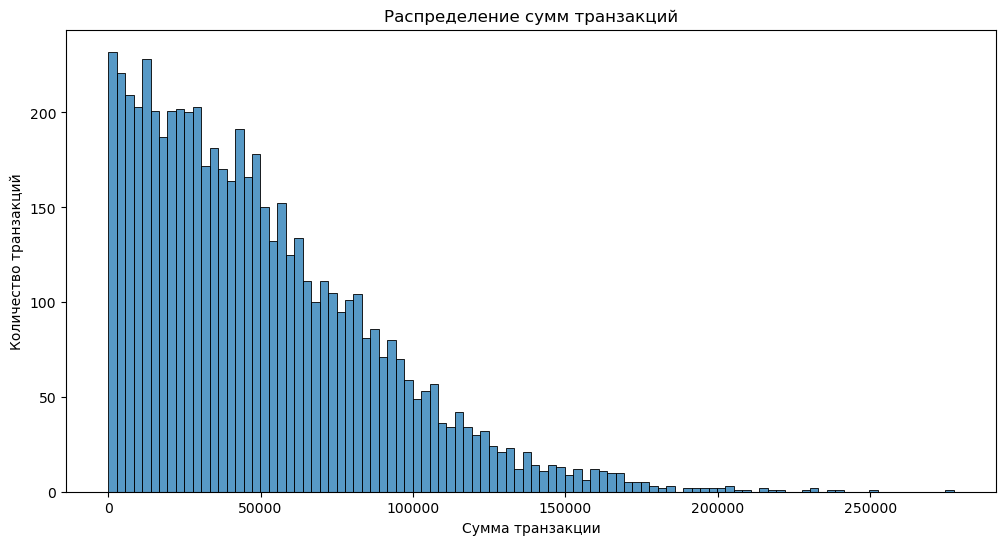

In [132]:
import seaborn as sbn
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sbn.histplot(data=transactions_data, x='amount', bins=100)

plt.title('Распределение сумм транзакций')
plt.xlabel('Сумма транзакции')
plt.ylabel('Количество транзакций')
plt.show()

2. Создать диаграмму выручки по услугам

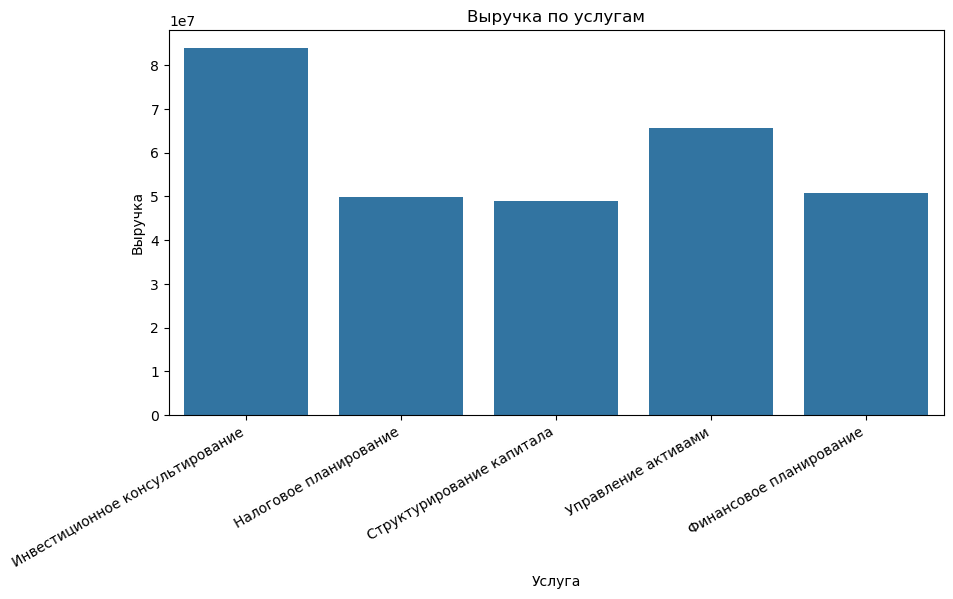

In [133]:
service = transactions_data.groupby('service')['amount'].sum().reset_index()
service.columns = ['услуга', 'выручка']

plt.figure(figsize=(10, 5))
sbn.barplot(data=service, x='услуга', y='выручка')

plt.title('Выручка по услугам')
plt.xlabel('Услуга')
plt.ylabel('Выручка')
plt.xticks(rotation=30, ha='right')
plt.show()

3. Построить график зависимости средней суммы транзакции от возраста клиентов

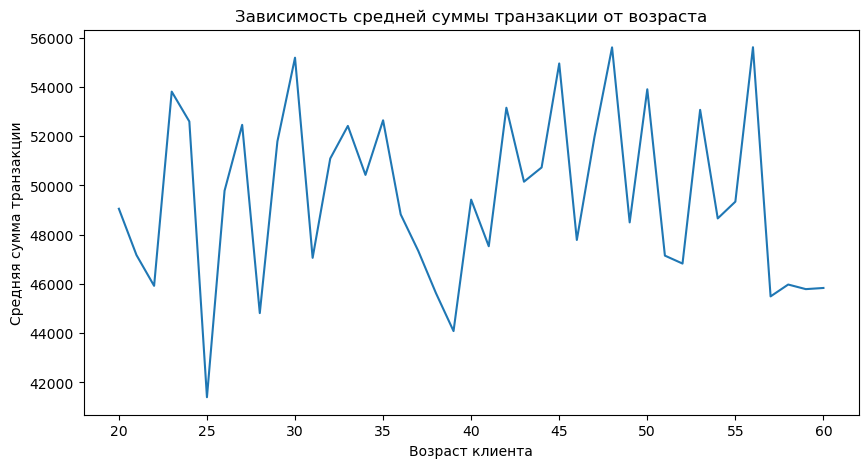

In [136]:
tramount = merged.groupby('age')['amount'].mean().reset_index()
tramount.columns = ['возраст', 'средняя сумма транзакций']

plt.figure(figsize=(10, 5))
plt.plot(tramount['возраст'], tramount['средняя сумма транзакций'])
plt.title('Зависимость средней суммы транзакции от возраста')
plt.xlabel('Возраст клиента')
plt.ylabel('Средняя сумма транзакции')
plt.show()